Python script to call tsFCI from R

In [6]:
import os
from run_tsfci import *
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch, FancyBboxPatch
from tigramite import plotting as tp
import numpy as np
from tigramite.plotting import plot_time_series_graph

In [11]:
#path = "C:/Users/sah12/Downloads/UML Project Code/Causal_with_Tigramite/monetary-shock-dag.csv"
path = "C:/Users/sah12/Downloads/linear_ts_with_confounder_n5000_vars8_lag4.csv"
#Returns a networkx graph
graph = tsfci(path, sig=0.01, tau=2)

.dot found
[1]

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xff in position 3: invalid start byte <traceback object at 0x0000026781CFD140>



Number of samples: 4998 
[1]

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xff in position 3: invalid start byte <traceback object at 0x0000026781CFC100>



[1]

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xff in position 3: invalid start byte <traceback object at 0x0000026781CFC540>



[1]

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xff in position 3: invalid start byte <traceback object at 0x0000026781CFC840>



[1]

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xff in position 3: invalid start byte <traceback object at 0x0000026781CFCF40>



[1]

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xff in position 3: invalid start byte <traceback object at 0x0000026781CFDA40>


In [12]:
TAIL_MAP  = { 'odot': '-', 'normal': '-', 'dot': 'o', 'none': '' }
HEAD_MAP  = { 'odot': '-', 'normal': '>', 'dot': 'o', 'none': '' }

def nx_pag_to_tigramite(G, labels):

    num_labels = len(labels)
    p_nodes = len(G.nodes())
    max_lag = p_nodes // num_labels - 1

    N = num_labels
    graph = np.full((N, N, max_lag + 1), '', dtype='<U4')

    idx_map = {node: int(node) - 1 for node in G.nodes()}

    for u, v, data in G.edges(data=True):
        iu = idx_map[u]
        iv = idx_map[v]

        var_u = iu % num_labels
        var_v = iv % num_labels

        lag_u = iu // num_labels
        lag_v = iv // num_labels

        tau = lag_v - lag_u
        if tau < 0:
            # remove illegal future to past nodes
            continue

        arrowtail = data.get('arrowtail', 'none')
        arrowhead = data.get('arrowhead', 'none')

        left  = TAIL_MAP.get(arrowtail, '')
        right = HEAD_MAP.get(arrowhead, '')

        pattern = f"{left}-{right}"

        #Fix directed edges 
        if tau == 0:
            if pattern in ("->", "-->", "<--", "- >", "> -"):
                pattern = "--"
                reverse = "--"
            else:
                reverse = pattern
        else:
            reverse = None

        graph[var_u, var_v, tau] = pattern

        if tau == 0:
            graph[var_v, var_u, 0] = reverse

    return graph, max_lag

In [13]:
labels = [
    "MonetaryShock_RR",
    "Inflation_CPI",
    "Consumption_PCE",
    "Output_IP",
    "baa_aaa_creditconditions",
    "assetprice_sp500",
    "RNUSBIS",
    "t_bill_inflationexpectations",
]

graph, tau_max = nx_pag_to_tigramite(graph, labels)

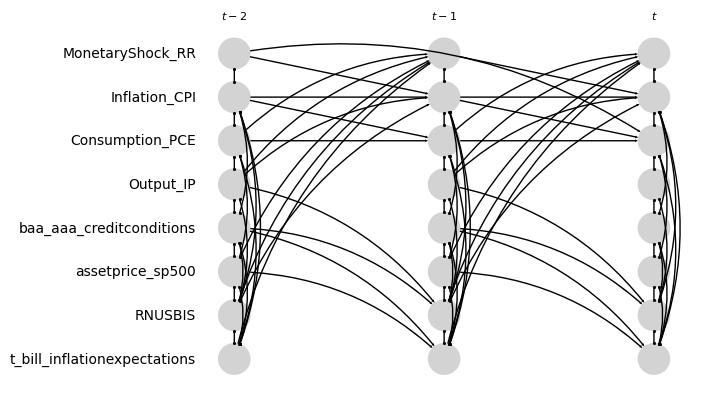

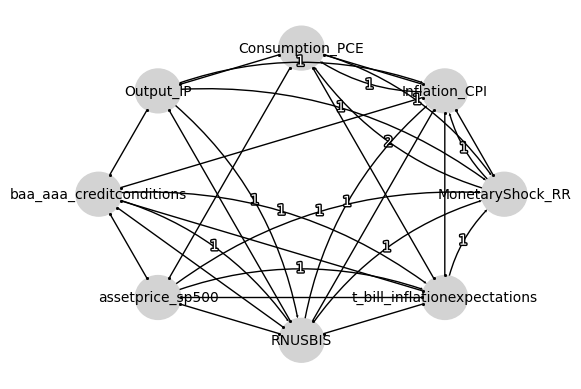

In [14]:
plot_time_series_graph(
    graph=graph,
    var_names=labels, arrow_linewidth=1,
)

tp.plot_graph(graph=graph,
    var_names=labels,arrow_linewidth=1)
plt.show()